# Lab 3: Bayes Classifier and Boosting

## Jupyter notebooks

In this lab, you can use Jupyter <https://jupyter.org/> to get a nice layout of your code and plots in one document. However, you may also use Python as usual, without Jupyter.

If you have Python and pip, you can install Jupyter with `sudo pip install jupyter`. Otherwise you can follow the instruction on <http://jupyter.readthedocs.org/en/latest/install.html>.

And that is everything you need! Now use a terminal to go into the folder with the provided lab files. Then run `jupyter notebook` to start a session in that folder. Click `lab3.ipynb` in the browser window that appeared to start this very notebook. You should click on the cells in order and either press `ctrl+enter` or `run cell` in the toolbar above to evaluate all the expressions.

Be sure to put `%matplotlib inline` at the top of every code cell where you call plotting functions to get the resulting plots inside the document.

## Import the libraries

In Jupyter, select the cell below and press `ctrl + enter` to import the needed libraries.
Check out `labfuns.py` if you are interested in the details.

In [3]:
import numpy as np
from scipy import misc
from imp import reload
from labfuns import *
import random
import warnings
warnings.filterwarnings('ignore')

## Bayes classifier functions to implement

The lab descriptions state what each function should do.

In [4]:
def computePrior(labels, W=None):
    Npts = labels.shape[0]
    if W is None:
        W = np.ones((Npts,1))/Npts
    else:
        assert(W.shape[0] == Npts)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    prior = np.zeros((Nclasses,1))

    # TODO: compute the values of prior for each class!
    # ==========================
    for i, c in enumerate(classes):
        idx = np.where(labels == c)[0]
        W_c = W[idx]
        prior[i] = np.sum(W_c)/np.sum(W)
    # ==========================

    return prior

def cal_Cov(X1, W):
    cov = np.zeros((X1.shape[1], X1.shape[1]))
    for i in range(X1.shape[1]):
        centrX = X1[:,i] - np.mean(X1[:,i])
        cov[i, i] = np.dot(np.multiply(centrX, centrX), W)/np.sum(W)
    return cov

def mlParams(X, labels, W=None):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    if W is None:
        W = np.ones((Npts,1))/float(Npts)

    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))

    # TODO: fill in the code to compute mu and sigma!
    # ==========================
    for i, c in enumerate(classes):
        idx = np.where(labels == c)[0]
        X_c = X[idx] 
        W_c = W[idx]
        mu[i, :] = np.dot(np.transpose(W_c), X_c)/np.sum(W_c)
        sigma[i, :, :] = cal_Cov(X_c, W_c)
    
    # ==========================

    return mu, sigma

def classifyBayes(X, prior, mu, sigma):

    Npts = X.shape[0]
    Nclasses,Ndims = np.shape(mu)
    logProb = np.zeros((Nclasses, Npts))

    # TODO: fill in the code to compute the log posterior logProb!
    # ==========================
    for k in range(Nclasses):
        for j in range(Npts):
            xstar = X[j]
            inv_s = np.linalg.inv(sigma[k])
            centerx = xstar-mu[k]
            r1 = -0.5*np.log(np.linalg.det(sigma[k])) 
            r2 = -0.5*np.dot(np.dot(centerx, inv_s), np.transpose(centerx))
            r3 = np.log(prior[k])
            logProb[k, j] = r1 + r2 + r3
    # ==========================
    
    # one possible way of finding max a-posteriori once
    # you have computed the log posterior
    h = np.argmax(logProb,axis=0)
    return h

The implemented functions can now be summarized into the `BayesClassifier` class, which we will use later to test the classifier, no need to add anything else here:

In [34]:
# NOTE: no need to touch this
class BayesClassifier(object):
    def __init__(self):
        self.trained = False

    def trainClassifier(self, X, labels, W=None):
        rtn = BayesClassifier()
        rtn.prior = computePrior(labels, W)
        rtn.mu, rtn.sigma = mlParams(X, labels, W)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBayes(X, self.prior, self.mu, self.sigma)

## Test the Maximum Likelihood estimates

Call `genBlobs` and `plotGaussian` to verify your estimates.

## Assignment 1

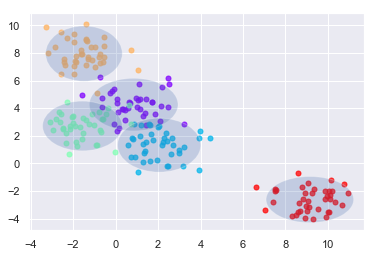

In [35]:
%matplotlib inline

X, labels = genBlobs(centers=5)
mu, sigma = mlParams(X,labels)
plotGaussian(X,labels,mu,sigma)

Call the `testClassifier` and `plotBoundary` functions for this part.

## Assignment 3

1. When can a feature independence assumption be reasonable and when not?

    If a feature is independent of any other feature, then the assumption is reasonable. But in fact, many features are dependent. For example, in NLP tasks, the words are related because of context. However, Naive Bayes models still work very well. 


2. How does the decision boundary look for the Iris dataset? How could one improve the classification results for this scenario by changing classifier or, alternatively, manipulating the data?

    The decision boundary between class 0 and the other two classes is well defined while the boundary between class 1 and class 2 is hard to be defined and overlapped. We could use more stronger classifier such as kernel-SVM, or apply nonlinear transformation to the data.

In [36]:
testClassifier(BayesClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 84.4
Trial: 10 Accuracy 95.6
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 86.7
Trial: 40 Accuracy 88.9
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 86.7
Trial: 70 Accuracy 91.1
Trial: 80 Accuracy 86.7
Trial: 90 Accuracy 91.1
Final mean classification accuracy  89 with standard deviation 4.16


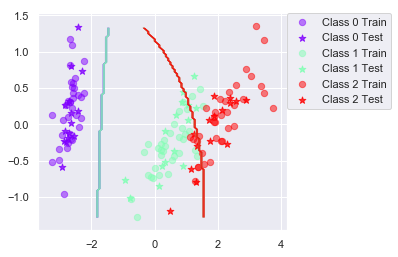

In [37]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='iris',split=0.7)

In [40]:
testClassifier(BayesClassifier(), dataset='vowel', split=0.7)

Trial: 0 Accuracy 61
Trial: 10 Accuracy 66.2
Trial: 20 Accuracy 74
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 64.3
Trial: 60 Accuracy 66.9
Trial: 70 Accuracy 63.6
Trial: 80 Accuracy 62.3
Trial: 90 Accuracy 70.8
Final mean classification accuracy  64.7 with standard deviation 4.03


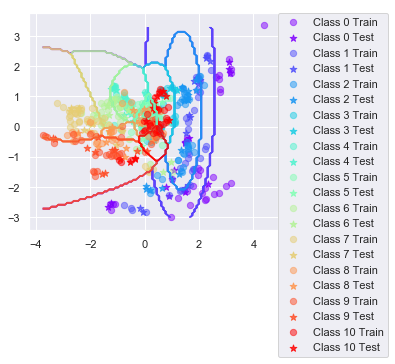

In [41]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='vowel',split=0.7)

## Boosting functions to implement

The lab descriptions state what each function should do.

In [7]:
def trainBoost(base_classifier, X, labels, T=10):
    # these will come in handy later on
    Npts,Ndims = np.shape(X)

    classifiers = [] # append new classifiers to this list
    alphas = [] # append the vote weight of the classifiers to this list

    # The weights for the first iteration
    wCur = np.ones((Npts,1))/float(Npts)

    for i_iter in range(0, T):
        # a new classifier can be trained like this, given the current weights
        classifiers.append(base_classifier.trainClassifier(X, labels, wCur))

        # do classification for each point
        vote = classifiers[-1].classify(X)

        # TODO: Fill in the rest, construct the alphas etc.
        # ==========================
        epsilon = np.dot(wCur.reshape(-1), (1-(vote == labels).astype(int)))
        alpha = 0.5*(np.log(1-epsilon)-np.log(epsilon))
        
        idxT = np.where(vote == labels)
        idxF = np.where(vote != labels)
        
        wCur[idxT] = wCur[idxT] * np.exp(-alpha)
        wCur[idxF] = wCur[idxF] * np.exp(alpha)
        wCur = wCur/np.sum(wCur)

        alphas.append(alpha) # you will need to append the new alpha
        # ==========================
        
    return classifiers, alphas

def classifyBoost(X, classifiers, alphas, Nclasses):
    Npts = X.shape[0]
    Ncomps = len(classifiers)

    # if we only have one classifier, we may just classify directly
    if Ncomps == 1:
        return classifiers[0].classify(X)
    else:
        votes = np.zeros((Npts,Nclasses))

        # TODO: implement classificiation when we have trained several classifiers!
        # here we can do it by filling in the votes vector with weighted votes
        # ==========================
        for t in range(Ncomps):
            vote = classifiers[t].classify(X)
            for x in range(Npts):
                votes[x, vote[x]] += alphas[t]
        # ==========================

        # one way to compute yPred after accumulating the votes
        return np.argmax(votes,axis=1)

The implemented functions can now be summarized another classifer, the `BoostClassifier` class. This class enables boosting different types of classifiers by initializing it with the `base_classifier` argument. No need to add anything here.

In [6]:
# NOTE: no need to touch this
class BoostClassifier(object):
    def __init__(self, base_classifier, T=10):
        self.base_classifier = base_classifier
        self.T = T
        self.trained = False

    def trainClassifier(self, X, labels):
        rtn = BoostClassifier(self.base_classifier, self.T)
        rtn.nbr_classes = np.size(np.unique(labels))
        rtn.classifiers, rtn.alphas = trainBoost(self.base_classifier, X, labels, self.T)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBoost(X, self.classifiers, self.alphas, self.nbr_classes)

## Run some experiments

Call the `testClassifier` and `plotBoundary` functions for this part.

## Assignment 5

1. Is there any improvement in classification accuracy? Why/why not?

    We see significant improvements on both datasets. (89->93.3 for iris; 64.7->80.4 for vowel)  
    Because the Adaboost algorithm repeatedly invokes a weak learning algorithm to give those misclassified samples higher weight and thus train it better. 


2. Plot the decision boundary of the boosted classifier on iris and compare it with that of the basic. What differences do you notice? Is the boundary of the boosted version more complex?

    The boundary becomes more fittable and complex than the former one. Because the boosting algorithm makes the model more focus on the misclassified samples.
    

3. Can we make up for not using a more advanced model in the basic classifier(e.g. independent features) by using boosting?
    
    Yes, using boosting could indeed make up for not using a more advanced model. But it would be better if we could try several weak classifier and choose the best one in order to decrease computing waste. For example, for iris, if we use Decision Tree Classifier we can easily get a high accuracy of 92.4 while only when we use boosting of Bayes Classifier we can get 93.3.

In [44]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 97.8
Trial: 10 Accuracy 93.3
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 88.9
Trial: 40 Accuracy 97.8
Trial: 50 Accuracy 93.3
Trial: 60 Accuracy 91.1
Trial: 70 Accuracy 95.6
Trial: 80 Accuracy 95.6
Trial: 90 Accuracy 93.3
Final mean classification accuracy  93.3 with standard deviation 6.92


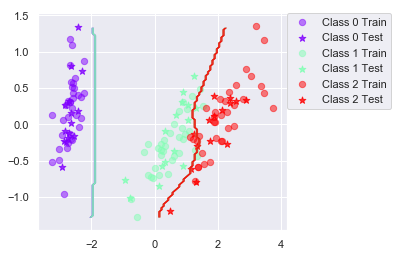

In [45]:
%matplotlib inline
plotBoundary(BoostClassifier(BayesClassifier()), dataset='iris',split=0.7)

In [46]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 78.6
Trial: 10 Accuracy 85.1
Trial: 20 Accuracy 81.8
Trial: 30 Accuracy 78.6
Trial: 40 Accuracy 74
Trial: 50 Accuracy 78.6
Trial: 60 Accuracy 81.8
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 76
Trial: 90 Accuracy 83.1
Final mean classification accuracy  80.4 with standard deviation 3.06


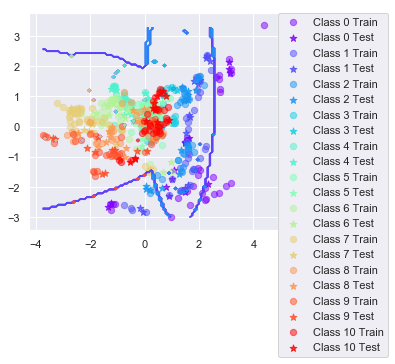

In [47]:
%matplotlib inline
plotBoundary(BoostClassifier(BayesClassifier()), dataset='vowel',split=0.7)

Now repeat the steps with a decision tree classifier.

## Assignment 6

Iris dataset: 92.4 -> 94.6

Vowels dataset: 64.1 -> 86.7

1. Is there any improvement in classification accuracy? Why/why not?

    Yes, and we get the biggest increase in accurancy on the Vowels dataset where data points are more mixed (Boosted DT help to reduce variance).

2. Plot the decision boundary of the boosted classifier on iris and compare it with that of the basic. What differences do you notice? Is the boundary of the boosted version more complex?

    Iris: The boundary of boosted models is more complex and have more inflection points. 

    Vowels: The boundary of boosted models is simpler and the boosting model helps to "prune" and thus reduce variance.



3. Can we make up for not using a more advanced model in the basic classifier (e.g. independent features) by using boosting?

    Yes. 



In [48]:
testClassifier(DecisionTreeClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 91.1
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 88.9
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 88.9
Final mean classification accuracy  92.4 with standard deviation 3.71


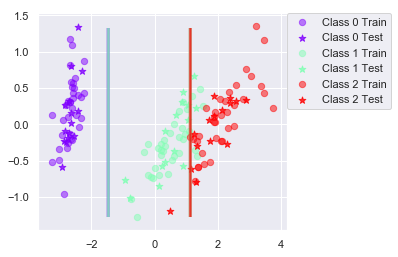

In [49]:
%matplotlib inline
plotBoundary(DecisionTreeClassifier(), dataset='iris',split=0.7)

In [50]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 95.6
Trial: 30 Accuracy 93.3
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 95.6
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 93.3
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.6 with standard deviation 3.65


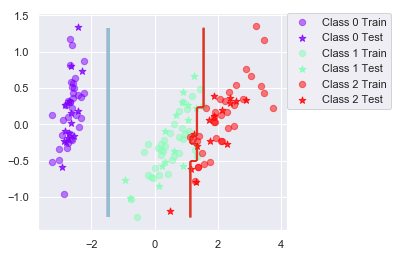

In [51]:
%matplotlib inline
plotBoundary(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

In [52]:
testClassifier(DecisionTreeClassifier(), dataset='vowel',split=0.7)

Trial: 0 Accuracy 63.6
Trial: 10 Accuracy 68.8
Trial: 20 Accuracy 63.6
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 63
Trial: 60 Accuracy 59.7
Trial: 70 Accuracy 68.8
Trial: 80 Accuracy 59.7
Trial: 90 Accuracy 68.2
Final mean classification accuracy  64.1 with standard deviation 4


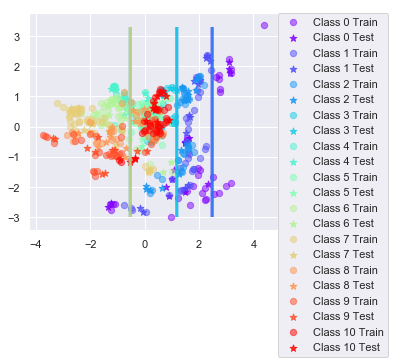

In [53]:
%matplotlib inline
plotBoundary(DecisionTreeClassifier(), dataset='vowel',split=0.7)

In [54]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 84.4
Trial: 10 Accuracy 86.4
Trial: 20 Accuracy 86.4
Trial: 30 Accuracy 91.6
Trial: 40 Accuracy 84.4
Trial: 50 Accuracy 80.5
Trial: 60 Accuracy 90.3
Trial: 70 Accuracy 85.1
Trial: 80 Accuracy 86.4
Trial: 90 Accuracy 89.6
Final mean classification accuracy  86.7 with standard deviation 2.95


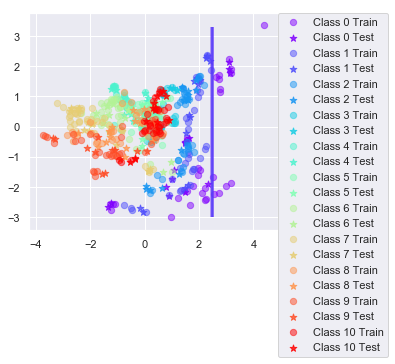

In [55]:
%matplotlib inline
plotBoundary(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='vowel',split=0.7)

## Assignment 7

If you had to pick a classifier, naive Bayes or a decision tree or the boosted versions of these, which one would you pick? Motivate from the following criteria:  
* Outliers:   
    Naive Bayes. Since DT will overfit the data and be misguided by the outliers and the boosting model will also focus more on the outliers. 

* Irrelevant inputs: part of the feature space is irrelevant   
    Decision Tree with boosting. Since Decision Tree models will automatically ignore those irrelevant features and in the meanwhile boosting could improve the performance. 
    
* Predictive power  
    Decision Tree with boosting. Since the auccuracy is higher for both datasets

* Mixed types of data: binary, categorical or continuous features, etc.  
    Decision Tree(with boosting). Since DTs are more flexible while Naive Bayes can only work well on continuous data. 

* Scalability: the dimension of the data, D, is large or the number of instances, N, is large, or both.  
    Decision Tree(without boosting). Decision trees perform well when the dataset is large while Naive Bayes cannot. Boosting algorithms require large computing ability. 

## Bonus: Visualize faces classified using boosted decision trees

Note that this part of the assignment is completely voluntary! First, let's check how a boosted decision tree classifier performs on the olivetti data. Note that we need to reduce the dimension a bit using PCA, as the original dimension of the image vectors is `64 x 64 = 4096` elements.

In [56]:
testClassifier(BayesClassifier(), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 88.3
Trial: 10 Accuracy 90.8
Trial: 20 Accuracy 85
Trial: 30 Accuracy 89.2
Trial: 40 Accuracy 89.2
Trial: 50 Accuracy 84.2
Trial: 60 Accuracy 91.7
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 81.7
Trial: 90 Accuracy 86.7
Final mean classification accuracy  87.7 with standard deviation 3.03


In [58]:
#testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='olivetti',split=0.7, dim=20)
# Accuracy 2.5 stable/failed

In [59]:
testClassifier(DecisionTreeClassifier(), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 65.8
Trial: 10 Accuracy 57.5
Trial: 20 Accuracy 49.2
Trial: 30 Accuracy 50
Trial: 40 Accuracy 53.3
Trial: 50 Accuracy 44.2
Trial: 60 Accuracy 49.2
Trial: 70 Accuracy 54.2
Trial: 80 Accuracy 50
Trial: 90 Accuracy 52.5
Final mean classification accuracy  48.4 with standard deviation 6.45


In [60]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 72.5
Trial: 10 Accuracy 70.8
Trial: 20 Accuracy 77.5
Trial: 30 Accuracy 70
Trial: 40 Accuracy 70
Trial: 50 Accuracy 71.7
Trial: 60 Accuracy 75.8
Trial: 70 Accuracy 50
Trial: 80 Accuracy 71.7
Trial: 90 Accuracy 73.3
Final mean classification accuracy  70 with standard deviation 6.83


You should get an accuracy around 70%. If you wish, you can compare this with using pure decision trees or a boosted bayes classifier. Not too bad, now let's try and classify a face as belonging to one of 40 persons!

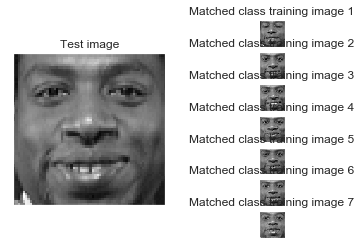

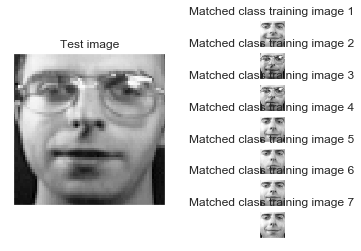

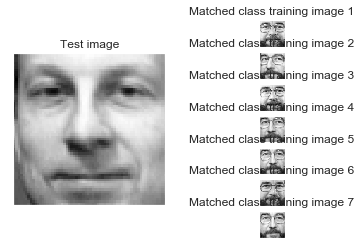

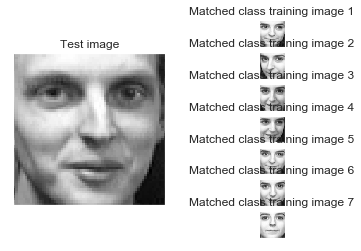

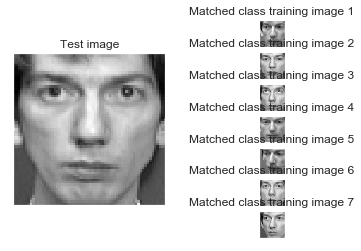

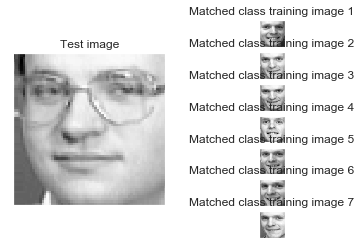

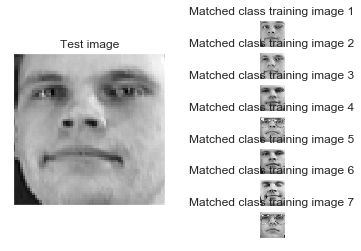

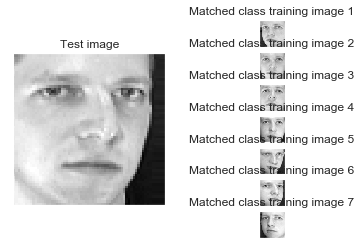

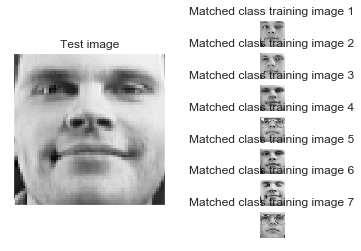

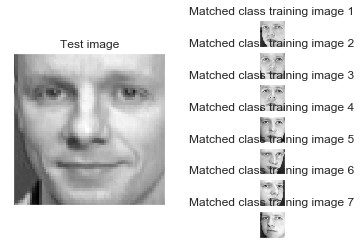

In [8]:
%matplotlib inline
X,y,pcadim = fetchDataset('olivetti') # fetch the olivetti data
xTr,yTr,xTe,yTe,trIdx,teIdx = trteSplitEven(X,y,0.7) # split into training and testing
pca = decomposition.PCA(n_components=20) # use PCA to reduce the dimension to 20
pca.fit(xTr) # use training data to fit the transform
xTrpca = pca.transform(xTr) # apply on training data
xTepca = pca.transform(xTe) # apply on test data
# use our pre-defined decision tree classifier together with the implemented
# boosting to classify data points in the training data
classifier = BoostClassifier(DecisionTreeClassifier(), T=10).trainClassifier(xTrpca, yTr)
yPr = classifier.classify(xTepca)
# choose a test point to visualize
for _ in range(10):
    testind = random.randint(0, xTe.shape[0]-1)
    # visualize the test point together with the training points used to train
    # the class that the test point was classified to belong to
    visualizeOlivettiVectors(xTr[yTr == yPr[testind],:], xTe[testind,:])